In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load the CSV data
df = pd.read_csv('parsed_filenames.csv')
# Create output folder if it doesn't exist
output_folder = 'over_time'
os.makedirs(output_folder, exist_ok=True)

# Group by 'State' and 'ElectionType'
grouped_df = df.groupby(['State', 'ElectionType'])

for group_name, group_data in grouped_df:
    if group_data['Date'].nunique() > 1:
        # Convert 'Date' to string to ensure it can be processed
        group_data['Date'] = group_data['Date'].astype(str)
        
        # Sort the group by the 'Date' (treating it as a string and sorting by the last 4 digits, which is the year)
        sorted_group = group_data.sort_values(by='Date', key=lambda x: x.str[-4:])
        
        # Extract filenames and corresponding years for each date
        filenames = sorted_group['filename'].tolist()
        years = sorted_group['Date'].apply(lambda x: x[-4:]).tolist()
        gamma_values = sorted_group['gamma'].tolist()
        
        # Create a new figure with a number of subplots equal to the number of images
        num_images = len(filenames)
        fig, axes = plt.subplots(nrows=num_images + 1, ncols=1, figsize=(10, 5 * (num_images + 1)))
        
        if num_images == 1:
            axes = [axes]  # Ensure axes is iterable if there's only one subplot

        # Plot the images
        for i, filename in enumerate(filenames):
            image_path = os.path.join('KDE_new', filename.replace('.csv', '.png'))
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"{years[i]} - {filename}")

        # Plot the gamma values
        axes[-1].plot(years, gamma_values, marker='o', linestyle='-')
        axes[-1].set_title('Gamma Values Over Time')
        axes[-1].set_xlabel('Year')
        axes[-1].set_ylabel('Gamma')
        axes[-1].set_ylim(0, 1)  # Ensure y-axis is from 0 to 1

        # Adjust layout
        plt.tight_layout()

        # Save the plot as a PDF in the 'over_time' folder
        output_file = os.path.join(output_folder, f"{group_name[0]}_{group_name[1]}.pdf")
        plt.savefig(output_file, format='pdf')
        
        # Close the figure to free up memory
        plt.close(fig)

MemoryError: Unable to allocate 307. MiB for an array with shape (3968, 5075, 4) and data type float32

: 

c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


MemoryError: Unable to allocate 285. MiB for an array with shape (3734, 4995, 4) and data type float32

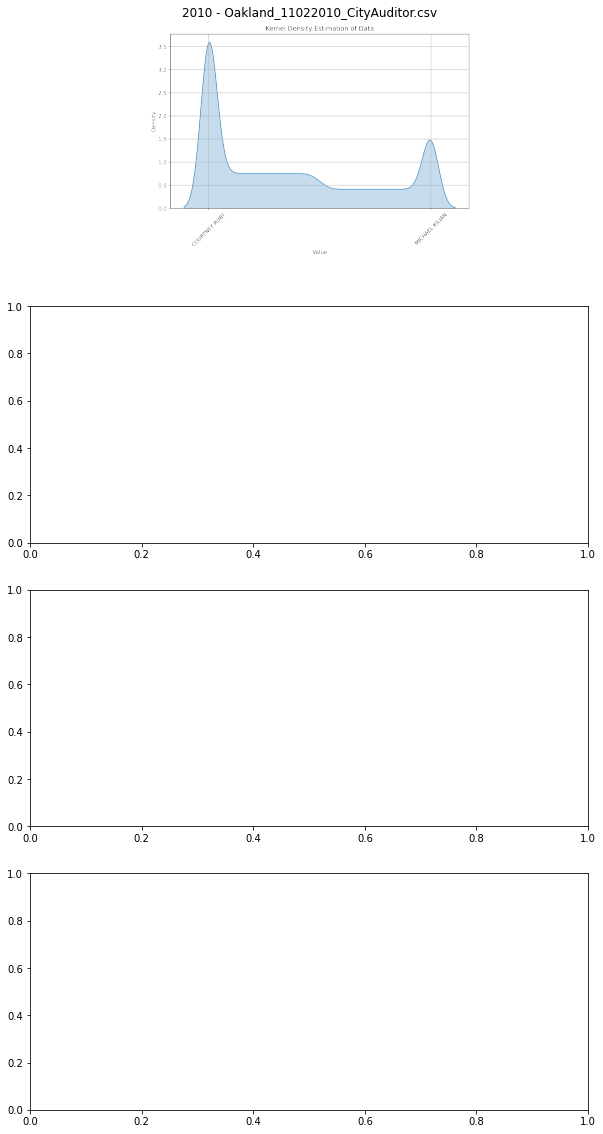

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load the CSV data
df = pd.read_csv('parsed_filenames.csv')

# Create output folder if it doesn't exist
output_folder = 'over_time'
os.makedirs(output_folder, exist_ok=True)

# Define the chunk size
chunk_size = 5  # Adjust this number based on your memory capacity

# Group by 'State' and 'ElectionType'
grouped_df = df.groupby(['State', 'ElectionType'])

# Function to process and save a chunk of data
def process_and_save_chunk(chunk):
    for group_name, group_data in chunk:
        if len(group_data) > 4:
            print(f"Skipping group {group_name} with {len(group_data)} files.")
            continue
        
        if group_data['Date'].nunique() > 1:
            # Convert 'Date' to string to ensure it can be processed
            group_data['Date'] = group_data['Date'].astype(str)
            
            # Sort the group by the 'Date' (treating it as a string and sorting by the last 4 digits, which is the year)
            sorted_group = group_data.sort_values(by='Date', key=lambda x: x.str[-4:])
            
            # Extract filenames and corresponding years for each date
            filenames = sorted_group['filename'].tolist()
            years = sorted_group['Date'].apply(lambda x: x[-4:]).tolist()
            gamma_values = sorted_group['gamma'].tolist()
            
            # Create a new figure with a number of subplots equal to the number of images
            num_images = len(filenames)
            fig, axes = plt.subplots(nrows=num_images + 1, ncols=1, figsize=(10, 5 * (num_images + 1)))
            
            if num_images == 1:
                axes = [axes]  # Ensure axes is iterable if there's only one subplot

            # Plot the images
            for i, filename in enumerate(filenames):
                image_path = os.path.join('KDE_new', filename.replace('.csv', '.png'))
                img = mpimg.imread(image_path)
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(f"{years[i]} - {filename}")

            # Plot the gamma values
            axes[-1].plot(years, gamma_values, marker='o', linestyle='-')
            axes[-1].set_title('Gamma Values Over Time')
            axes[-1].set_xlabel('Year')
            axes[-1].set_ylabel('Gamma')
            axes[-1].set_ylim(0, 1)  # Ensure y-axis is from 0 to 1

            # Adjust layout
            plt.tight_layout()

            # Save the plot as a PDF in the 'over_time' folder
            output_file = os.path.join(output_folder, f"{group_name[0]}_{group_name[1]}.pdf")
            plt.savefig(output_file, format='pdf')
            
            # Close the figure to free up memory
            plt.close(fig)

# Process and save the data in chunks
grouped_df_list = list(grouped_df)
for i in range(0, len(grouped_df_list), chunk_size):
    chunk = grouped_df_list[i:i + chunk_size]
    process_and_save_chunk(chunk)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load the CSV data
df = pd.read_csv('parsed_filenames.csv')

# Create output folder if it doesn't exist
output_folder = 'over_time'
os.makedirs(output_folder, exist_ok=True)

# Define the chunk size
chunk_size = 5  # Adjust this number based on your memory capacity

# Group by 'State' and 'ElectionType'
grouped_df = df.groupby(['State', 'ElectionType'])

# Flag to start processing after the specified group
start_processing = False

# Function to process and save a chunk of data
def process_and_save_chunk(chunk):
    for group_name, group_data in chunk:
        if len(group_data) > 4:
            print(f"Skipping group {group_name} with {len(group_data)} files.")
            continue
        
        if group_data['Date'].nunique() > 1:
            try:
                # Convert 'Date' to string to ensure it can be processed
                group_data['Date'] = group_data['Date'].astype(str)
                
                # Sort the group by the 'Date' (treating it as a string and sorting by the last 4 digits, which is the year)
                sorted_group = group_data.sort_values(by='Date', key=lambda x: x.str[-4:])
                
                # Extract filenames and corresponding years for each date
                filenames = sorted_group['filename'].tolist()
                years = sorted_group['Date'].apply(lambda x: x[-4:]).tolist()
                gamma_values = sorted_group['gamma'].tolist()
                
                # Create a new figure with a number of subplots equal to the number of images
                num_images = len(filenames)
                fig, axes = plt.subplots(nrows=num_images + 1, ncols=1, figsize=(10, 5 * (num_images + 1)))
                
                if num_images == 1:
                    axes = [axes]  # Ensure axes is iterable if there's only one subplot

                # Plot the images
                for i, filename in enumerate(filenames):
                    image_path = os.path.join('KDE_new', filename.replace('.csv', '.png'))
                    img = mpimg.imread(image_path)
                    axes[i].imshow(img)
                    axes[i].axis('off')
                    axes[i].set_title(f"{years[i]} - {filename}")

                # Plot the gamma values
                axes[-1].plot(years, gamma_values, marker='o', linestyle='-')
                axes[-1].set_title('Gamma Values Over Time')
                axes[-1].set_xlabel('Year')
                axes[-1].set_ylabel('Gamma')
                axes[-1].set_ylim(0, 1)  # Ensure y-axis is from 0 to 1

                # Adjust layout
                plt.tight_layout()

                # Save the plot as a PDF in the 'over_time' folder
                output_file = os.path.join(output_folder, f"{group_name[0]}_{group_name[1]}.pdf")
                plt.savefig(output_file, format='pdf')
                
                # Close the figure to free up memory
                plt.close(fig)

            except MemoryError:
                print(f"MemoryError encountered while processing group {group_name}. Skipping to the next group.")
                continue  # Skip to the next group in case of a memory error

# Convert grouped_df to list for iteration
grouped_df_list = list(grouped_df)

# Process groups
for i, (group_name, group_data) in enumerate(grouped_df_list):
    if not start_processing:
        if group_name == ('Minneapolis', 'Ward13CityCouncil'):
            start_processing = True
        continue  # Skip groups until the target group is reached

    # Process in chunks
    chunk = grouped_df_list[i:i + chunk_size]
    process_and_save_chunk(chunk)


MemoryError encountered while processing group ('Minneapolis', 'Ward1CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward3CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward4CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward5CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward3CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward4CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward5CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward6CityCouncil'). Skipping to the next group.
MemoryError encountered while processing group ('Minneapolis', 'Ward3CityCouncil'). Skipping to the next

C:\Users\mahsh\AppData\Local\Temp\ipykernel_4252\496125799.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=num_images + 1, ncols=1, figsize=(10, 5 * (num_images + 1)))


MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict2'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict3'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict1'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict2'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict3'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict4'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict1'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict2'). Skipping to the next group.
MemoryError encountered while processing group ('Oakland', 'CityCouncilDistrict3'). Skipping to the next